<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта." data-toc-modified-id="Описание-проекта.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта.</a></span></li><li><span><a href="#Подготовка-данных." data-toc-modified-id="Подготовка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных.</a></span><ul class="toc-item"><li><span><a href="#Начальное-заключение:" data-toc-modified-id="Начальное-заключение:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Начальное заключение:</a></span></li></ul></li><li><span><a href="#Моделиривание-без-учета-дисбаланса." data-toc-modified-id="Моделиривание-без-учета-дисбаланса.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Моделиривание без учета дисбаланса.</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия." data-toc-modified-id="Логистическая-регрессия.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Логистическая регрессия.</a></span></li><li><span><a href="#Дерево-решений." data-toc-modified-id="Дерево-решений.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Дерево решений.</a></span></li><li><span><a href="#Случайный-лес." data-toc-modified-id="Случайный-лес.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Случайный лес.</a></span></li></ul></li><li><span><a href="#Моделирование-с-учетом-дисбаланса." data-toc-modified-id="Моделирование-с-учетом-дисбаланса.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Моделирование с учетом дисбаланса.</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов." data-toc-modified-id="Взвешивание-классов.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Взвешивание классов.</a></span></li><li><span><a href="#Увеличение-выборки." data-toc-modified-id="Увеличение-выборки.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Увеличение выборки.</a></span></li><li><span><a href="#Уменьшение-выборки." data-toc-modified-id="Уменьшение-выборки.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Уменьшение выборки.</a></span></li></ul></li><li><span><a href="#Финальное-тестирование." data-toc-modified-id="Финальное-тестирование.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Финальное тестирование.</a></span></li><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Описание проекта.

Заказчик - «Бета-Банк». Необходимо провести анализ клиентов для создания системы предсказания, покинет ли клиент данный банк в ближайшее время или нет. Такая информация позволит подобрать подходящий способ удержать клиента в данном банке - по мнению банковских маркетологов сохранять текущих клиентов выйдет для банка дешевле, чем привлекать новых.  

Входные данные - исторические данные о поведении клиентов и расторжении договоров с банком.  

Основная задача - построить модель для задачи классификации, которая будет прогнозировать, уйдет ли клиент из банка в ближайшее время или нет. Необходимое условие: значение показателя F1-меры должно превышать порог в 0.59.  

Признаки:  

* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

Целевой признак:  

* Exited — факт ухода клиента

## Подготовка данных.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('Churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


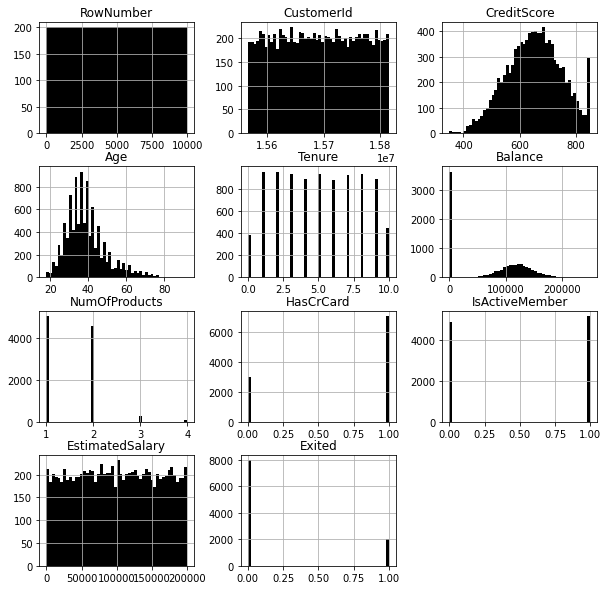

In [5]:
data.hist(figsize=(10, 10), bins = 50, color='black')
plt.show()

### Начальное заключение:

Большая часть переменных в нашем наборе данных представлена числовыми типами: float64 и int64, но также есть три переменные с типом object. Для дальнейшего моделирования нам нужно решить, как обработать эти переменные, так как их нельзя просто использовать в исходном виде. 

Первая переменная, фамилия клиента, не содержит достаточно информации, чтобы быть полезной при моделировании поведения клиентов. Поэтому мы решили удалить эту характеристику из нашего набора данных. Другие две переменные - пол и регион проживания клиента - могут оказывать влияние на поведение клиента и будут ключевыми при моделировании. Мы закодируем их при помощи метода One-Hot-Encoding, чтобы сделать их годными для использования в модели. 

Также мы обнаружили наличие пропущенных данных в одной из характеристик - количество лет, в течение которых клиент пользовался услугами банка.

Начнем с заполнения пропусков. Выведем дискриптивную статистику по переменной Tenure. Позже, после заполнения, мы сравним новые данные, чтобы быть уверенными, что мы не слишком исказили выборку.

In [6]:
print(data['Tenure'].describe())
data['Tenure'] = data['Tenure'].fillna(-1)

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64


При обработке наших данных мы заметили наличие пропущенных значений у одной из характеристик, и мы решили использовать информацию о возрасте клиента для заполнения этих пропусков. 

Для этого мы построили сводную таблицу, в которой вычисляется медианное значение периода времени, в течение которого клиенты нашего банка остаются его клиентами, в зависимости от возраста. Затем мы создали функцию, которая будет возвращать полученное медианное значение для наблюдений с пропущенными значениями данной характеристики. 

Такой подход позволяет заполнить пропущенные значения на основе подобной информации, а именно сравнения продолжительности оставания клиента в банке в зависимости от его возраста. Это помогает сохранить как можно больше информации, чтобы у нас были достоверные данные для обучения наших моделей.

In [7]:
ten_piv = data.pivot_table(index='Age', values = 'Tenure', aggfunc=['median']).reset_index()
ten_piv.columns = ['Age', 'Median']
ten_piv.head()

,Age,Median
0,18,4.0
1,19,5.0
2,20,4.0
3,21,4.0
4,22,5.0


In [8]:
def tenur_miss(row):
    age = row['Age']
    tenure = row['Tenure']
    if tenure == -1:
        for i in range(len(ten_piv)):
            if ten_piv['Age'][i] == age:
                return ten_piv['Median'][i]
    else: return tenure

In [9]:
data['Tenure'] = data.apply(tenur_miss, axis=1)

In [10]:
print(data['Tenure'].describe())

count    10000.000000
mean         4.948700
std          2.769609
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


Нам удалось заполнить пропущенные значения и при этом значительно не исказить исходные данные перед моделированием.

Теперь займемся созданием дамми-категорий. Для этого, прежде всего, удалим переменную, отвечающую за фамилию клиента. После этого создадим сами дамми-переменные, используя встроенные функции.

In [11]:
del data['Surname']
data = pd.get_dummies(data, drop_first=True)

In [12]:
data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Поскольку в данных присутсвует сильный дисбаланс, в чем мы убедимся далее, — учтем это при разбиении данных на тренировочные и тестовые.

In [13]:
X_numb = data.copy().drop(['Exited', 'RowNumber', 'CustomerId'], axis=1)
y = data[['Exited']]

In [14]:
RANDOM_STATE = 9

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_numb, y,
                                                  test_size=0.2, 
                                                  stratify = y,
                                                  shuffle = True,
                                                  random_state=RANDOM_STATE)

Наконец, перейдем к заключительному этапу моделирования - стандартизации численных переменных. Обучим скалер на тренировочной выборке, после чего применим его к тестовым и тренировочным данным.

In [16]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [17]:
scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

In [18]:
print('Размер тренировочной выборки:', X_train.shape, y_train.shape)
print('Размер тестовой выборки:', X_test.shape, y_test.shape)

Размер тренировочной выборки: (8000, 11) (8000, 1)
Размер тестовой выборки: (2000, 11) (2000, 1)


При работе с нашими данными мы установили наличие переменных со строковыми значениями типа object, которые не могут быть использованы напрямую в моделях машинного обучения. Для того, чтобы преобразовать данные переменные, мы перевели часть их в категориальные дамми-переменные, а оставшееся неинформативное пространство удалили из исходного набора данных.

Также мы обнаружили пропуски в данных характеристиках, которые нам удалось заполнить, используя информацию о возрасте клиентов.

Для того чтобы использовать данные в наших моделях, мы разделили их на тренировочные и тестовые выборки, учитывая наличие дисбаланса между классами.

Чтобы более эффективно использовать данные в моделировании, мы также применили метод стандартизации, который помог выровнять масштаб данных и устранить возможные искажения результатов, вызванные различиями в масштабе переменных.

## Моделиривание без учета дисбаланса.

0    7963
1    2037
Name: Exited, dtype: int64


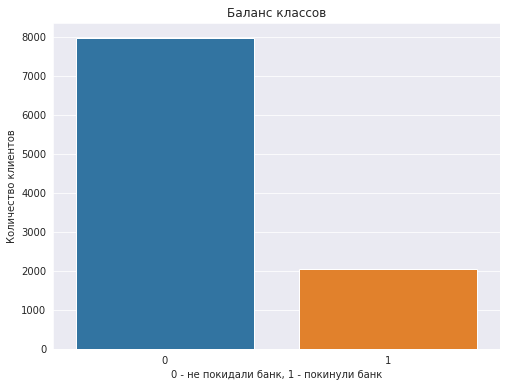

In [19]:
sns.set_style('darkgrid')
# график баланса классов
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=y, x='Exited', ax=ax)
ax.set_title('Баланс классов')
ax.set_xlabel('0 - не покидали банк, 1 - покинули банк')
ax.set_ylabel('Количество клиентов')

# вывод количества значений каждого класса в датасете
print(y['Exited'].value_counts())

Наше исследование данных показало, что в нашем наборе данных присутствует дисбаланс классов - большинство клиентов не являются требуемыми для нашей работы оттоков. Такой дисбаланс может привести к низкому качеству моделирования и предсказаниям. Однако, прежде чем применять специальные методы балансирования классов, мы должны убедиться, насколько важна проблема дисбаланса в данном наборе данных.

Для нашего исследования мы собираемся использовать три модели машинного обучения - логистическую регрессию, дерево решений и случайный лес. Мы будем использовать метод GridSearch для подбора оптимальных параметров каждой модели, чтобы достичь наивысшего значения F1-меры. После того, как мы получим оптимальные значения параметров для каждой модели, мы сможем решить необходимость или необходимость применения методов балансировки классов для улучшения наших результатов.

Выявление наличия дисбаланса классов в нашем наборе данных является критически важным шагом в построении эффективной модели машинного обучения. Когда классы несбалансированы, модель может столкнуться с проблемой неспособности правильно идентифицировать менее представленный класс, что может привести к ошибочным или неточным предсказаниям.

При построении нашего прогнозного моделирования мы проверяем влияние дисбаланса классов на производительность каждой модели, используемой в рассматриваемом исследовании. 

В частности, мы будем использовать логистическую регрессию, дерево решений и случайный лес для построения моделей машинного обучения, которые могут выделять тех клиентов, которые склонны к отказу от использования услуг нашего банка. 

Для того, чтобы моделирование было более точным, мы будем использовать метод GridSearch для оптимизации параметров моделей и достижения наивысшей F1-меры. 

И только после того, как мы получим оптимальные значения параметров для каждой модели, мы сможем применять специальные методы балансирования классов, если эти методы будут необходимы для улучшения результатов нашей работы. Эти методы могут включать в себя такие техники, как взвешивание классов, увеличение образцов, сокращение образцов, перевзвешивание и другие. 

Однако, применение методов балансировки классов не всегда обязательно, особенно если дисбаланс классов не настолько значителен, и наши модели могут хорошо работать без вмешательства. 

В целом, наша работа состоит в том, чтобы найти оптимальную модель для прогнозирования клиентов, могущих отказаться от использования услуг нашего банка. Мы будем использовать лучшие модели и методы обработки данных и балансировки классов, чтобы получить максимально точные результаты.

### Логистическая регрессия.

У данной модели мы рассмотрим два параметра: solvers и penalty.  
Параметр solvers выбирает оптимальный решатель для решения задачи, а параметр penalty добавляет регуляризацию, которая позволяет преодолеть проблему переобучения путем снижения значений коэффициентов. Кроме того, важно учитывать, что определенный вид регуляризации может не подходить для конкретного решателя, поэтому необходимо проводить комплексную настройку параметров для получения наилучших результатов. Также важно следить за метрикой F1-мера, чтобы находить оптимальные значения параметров solvers и penalty на тренировочной выборке.

In [20]:
logit = LogisticRegression(random_state=RANDOM_STATE)
# Определяем модель для обучения
params_log = {"penalty":["l1","l2"], "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# Установливаем параметры для перебора
cv_log = GridSearchCV(logit, param_grid=params_log,
                      cv=5, scoring='f1')

cv_log.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=9),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [21]:
print('Лучшая логистическая регерссия:', cv_log.best_estimator_)
print('F-1 score:', cv_log.best_score_)
predict_one = cv_log.predict_proba(X_train)[:, 1]
print('ROC-AUC:', roc_auc_score(y_train, predict_one))

Лучшая логистическая регерссия: LogisticRegression(penalty='l1', random_state=9, solver='liblinear')
F-1 score: 0.3119700320586077
ROC-AUC: 0.7684962101877089


Модель логистической регрессии с использованием лучших параметров, которые были определены (penalty='l1' и solver='liblinear'), не достигает необходимого уровня точности по метрике F1-мера, который был установлен в 0,59. Следовательно, данная модель с выбранными параметрами не подходит для решения наше задачи, и необходимо рассмотреть другие модели.

### Дерево решений.

Давайте обсудим другую модель - решающее дерево. Для этой модели мы можем определить два параметра - max_depth и max_features. Параметр max_depth отвечает за максимальную глубину дерева, то есть, сколько узлов может быть в дереве. Второй параметр - max_features - определяет максимальное количество признаков, которые могут быть использованы для определения лучшего разбиения в дереве.

In [22]:
decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
# Задаем модель для обучения
params_tree = {'max_depth': range (1, 9, 1), 'max_features': ['auto', 'sqrt', 'log2']}
# Устанавливаем параметры для перебора
cv_tree = GridSearchCV(decision_tree, param_grid=params_tree,
                      cv=5, scoring='f1')

cv_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=9),
             param_grid={'max_depth': range(1, 9),
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='f1')

In [23]:
print('Лучшее дерево решений:', cv_tree.best_estimator_)
print('F-1 score:', cv_tree.best_score_)
predict_one = cv_tree.predict_proba(X_train)[:, 1]
print('ROC-AUC:', roc_auc_score(y_train, predict_one))

Лучшее дерево решений: DecisionTreeClassifier(max_depth=8, max_features='auto', random_state=9)
F-1 score: 0.5241899630498322
ROC-AUC: 0.8648397877319876


Наилучшее дерево решений было определено с параметрами max_depth=8 и max_features='auto'. Это привело к повышению качества модели, но не достаточно для превышения порогового значения для F1-меры, равного 0,59. Следовательно, мы можем сделать вывод, что модель решающего дерева с такими параметрами также не является подходящей.

### Случайный лес.

Давайте перейдем к обсуждению последней модели - случайного леса. Для этой модели мы можем определить несколько параметров - max_depth и max_features, которые мы уже рассмотрели при построении решающего дерева, и параметр n_estimators. Он определяет количество деревьев, которые создаст наша модель для обработки данных.

In [24]:
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
# Задаем модель для обучения
params_forest = {'max_depth': range (1, 9, 1), 'max_features': ['auto', 'sqrt', 'log2'],
                 'n_estimators': range(50, 100, 10)}
# Указываем параметры для перебора
cv_forest = GridSearchCV(random_forest, param_grid=params_forest,
                      cv=5, scoring='f1')

cv_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=9),
             param_grid={'max_depth': range(1, 9),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(50, 100, 10)},
             scoring='f1')

In [25]:
print('Лучший случайный лес:', cv_forest.best_estimator_)
print('F-1 score:', cv_forest.best_score_)
predict_one = cv_forest.predict_proba(X_train)[:, 1]
print('ROC-AUC:', roc_auc_score(y_train, predict_one))

Лучший случайный лес: RandomForestClassifier(max_depth=8, n_estimators=80, random_state=9)
F-1 score: 0.5537307520405796
ROC-AUC: 0.9086269996436517


In [26]:
best_forest = RandomForestClassifier(max_depth=8, n_estimators=80, random_state=RANDOM_STATE)
scores = cross_validate(best_forest, X_train, y_train, scoring='f1', cv=5, return_estimator=True)
best_forest.fit(X_train, y_train)

print('Лучший случайный лес:', best_forest)
print('F-1 score:', scores['test_score'].mean())
print('ROC-AUC:', roc_auc_score(y_train, (best_forest.predict_proba(X_train)[:, 1])))

Лучший случайный лес: RandomForestClassifier(max_depth=8, n_estimators=80, random_state=9)
F-1 score: 0.5537307520405796
ROC-AUC: 0.9086269996436517


Лучшая модель случайного леса имеет глубину дерева (max_depth) равную 8 и количество деревьев (n_estimators) равное 80. Хотя значение ключевой метрики не достигло порогового значения, данная модель все же показывает наибольшее значение данной метрики.  

Кроме того, заметно, что у каждой модели ROC-AUC имел весьма высокое значение, особенно у модели случайного леса, что говорит о ее качественной работе. Это происходит потому, что F1-мера лучше оценивает выборки с неравными классами, а также оценивает правильность предсказаний положительного класса, что является главной нашей задачей.  

Таким образом, мы можем заключить, что в условиях дисбаланса классов нашего таргета достаточно сложно получить качественную модель с высоким значением F1-меры, не учитывая этот дисбаланс при обучении модели.

## Моделирование с учетом дисбаланса.

Наши исходные модели, обученные на недостаточно сбалансированных данных, не дали хороших результатов - ни у одной из моделей не достигаемый показатель F1-меры не достиг порогового значения в 0.59. Таким образом, мы можем утверждать, что неравное распределение классов оказывает значительное влияние на предсказательную силу и качество получаемых моделей. Для достижения требуемой для заказчика модели нам следует провести дальнейшую работу и принять меры для снижения влияния дисбаланса.

Мы будем применять следующие методы для балансировки данных:

1. Взвешивание классов.
2. Увеличение выборки.

### Взвешивание классов.

Для снижения дисбаланса классов мы решаем использовать взвешенную классификацию с параметром "balanced". Таким образом, каждый класс будет взвешен на основе своей доли в общей выборке. Обращая внимание на то, что модель случайного леса дала наиболее высокое качество при моделировании без учета дисбаланса, мы будем использовать именно эту модель в дальнейшем.

In [27]:
random_forest = RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced')
# Задаем модель для обучения
params_forest = {'max_depth': range (1, 9, 1), 'max_features': ['auto', 'sqrt', 'log2'], 
                 'n_estimators': range(50, 100, 10)}
# Указываем параметры для перебора
cv_forest_balanced = GridSearchCV(random_forest, param_grid=params_forest,
                      cv=5, scoring='f1', n_jobs=-1)

cv_forest_balanced.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=9),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 9),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(50, 100, 10)},
             scoring='f1')

In [28]:
print('Лучший случайный лес:', cv_forest_balanced.best_estimator_)
print('F-1 score:', cv_forest_balanced.best_score_)
predict_one = cv_forest_balanced.predict_proba(X_train)[:, 1]
print('ROC-AUC:', roc_auc_score(y_train, predict_one))

Лучший случайный лес: RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=60,
                       random_state=9)
F-1 score: 0.6156321176769578
ROC-AUC: 0.9145094432298639


In [29]:
best_forest_balanced = RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=60,
                                              random_state=RANDOM_STATE)
scores = cross_validate(best_forest_balanced, X_train, y_train, scoring='f1', cv=5, return_estimator=True)
best_forest_balanced.fit(X_train, y_train)

print('Лучший случайный лес:', best_forest_balanced)
print('F-1 score:', scores['test_score'].mean())
print('ROC-AUC:', roc_auc_score(y_train, (best_forest_balanced.predict_proba(X_train)[:, 1])))

Лучший случайный лес: RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=60,
                       random_state=9)
F-1 score: 0.6156321176769578
ROC-AUC: 0.9145094432298639


Модель случайного леса с применением взвешенной классификации, имеющая глубину дерева (max_depth) равную 8 и количество деревьев (n_estimators) равное 60, дала наилучшие результаты по показателю F1-меры, превышая пороговое значение. Кроме того, метрика ROC-AUC, полученная для данной модели, также достаточно высока.

Несмотря на это, мы не будем останавливаться на достигнутом и попробуем увеличить значимость другого ключевого параметра.

Дерево.

In [31]:
decision_tree_balanced = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')
# Задаем модель для обучения
params_tree_balanced = {'max_depth': range (1, 9, 1), 'max_features': ['auto', 'sqrt', 'log2']}
# Устанавливаем параметры для перебора
cv_tree_balanced = GridSearchCV(decision_tree_balanced, param_grid=params_tree_balanced,
                      cv=5, scoring='f1')

cv_tree_balanced.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=9),
             param_grid={'max_depth': range(1, 9),
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='f1')

In [32]:
print('Лучшее дерево решений:', cv_tree_balanced.best_estimator_)
print('F-1 score:', cv_tree_balanced.best_score_)
predict_one = cv_tree_balanced.predict_proba(X_train)[:, 1]
print('ROC-AUC:', roc_auc_score(y_train, predict_one))

Лучшее дерево решений: DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       max_features='auto', random_state=9)
F-1 score: 0.552283092724097
ROC-AUC: 0.8527443634367385


Лучшее дерево решений, определенное с использованием параметров "class_weight='balanced'", "max_depth=8", "max_features='auto'" и "random_state=9", достигает F-1 score 0.552283092724097 и ROC-AUC 0.8527443634367385.

F-1 score 0.552283092724097 указывает на среднюю точность и полноту предсказаний модели. Это значит, что модель правильно классифицирует около 55.2% положительных объектов.

ROC-AUC 0.8527443634367385 говорит о том, что модель обладает хорошей способностью различать между классами. Чем ближе ROC-AUC к 1, тем лучше модель классификации различает между положительными и отрицательными объектами.

Общий вывод: лучшее дерево решений, созданное с использованием указанных параметров, показывает приемлемые результаты с точки зрения F-1 score и отличные результаты по метрике ROC-AUC. Однако, для полного понимания качества модели, рекомендуется провести дополнительный анализ и сравнение с другими моделями классификации.

Логистическая регрессия.

In [34]:
logit_balanced = LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced')
# Определяем модель для обучения
params_log_balanced = {"penalty":["l1","l2"], "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# Установливаем параметры для перебора
cv_log_balanced = GridSearchCV(logit_balanced, param_grid=params_log_balanced,
                      cv=5, scoring='f1')

cv_log_balanced.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=9),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [35]:
print('Лучшая логистическая регерссия:', cv_log_balanced.best_estimator_)
print('F-1 score:', cv_log_balanced.best_score_)
predict_one = cv_log_balanced.predict_proba(X_train)[:, 1]
print('ROC-AUC:', roc_auc_score(y_train, predict_one))

Лучшая логистическая регерссия: LogisticRegression(class_weight='balanced', penalty='l1', random_state=9,
                   solver='saga')
F-1 score: 0.4942757569255122
ROC-AUC: 0.7718340380040644


Лучшая логистическая регрессия, определенная с использованием параметров "class_weight='balanced'", "penalty='l1'", "random_state=9" и "solver='saga'", достигает F-1 score 0.4942757569255122 и ROC-AUC 0.7718340380040644.

F-1 score 0.4942757569255122 указывает на относительно низкую точность и полноту предсказаний модели. Это означает, что модель правильно классифицирует около 49.4% положительных объектов.

ROC-AUC 0.7718340380040644 говорит о том, что модель обладает неплохой способностью различать между классами, но она имеет меньшую разницу между TPR и FPR по сравнению с предыдущим примером.

Общий вывод: лучшая логистическая регрессия, созданная с использованием указанных параметров, не демонстрирует высокую точность и полноту предсказаний, и ее способность различать между классами несколько ниже, чем у предыдущего примера с деревом решений.

### Увеличение выборки.

Для решения проблемы дисбаланса классов мы также применяем метод увеличения выборки. Этот метод заключается в искусственном увеличении числа наблюдений необходимого нам класса путем дублирования существующих записей. Конкретно в нашем случае мы увеличим количество наблюдений, относящихся к положительной категории.

In [39]:
repeat = round(X_train[y_train['Exited'] == 0]['CreditScore'].count()/
    X_train[y_train['Exited'] == 1]['CreditScore'].count())

In [40]:
def upsample(features, target, repeat):
    features_zeros = features[target['Exited'] == 0]
    features_ones = features[target['Exited'] == 1]
    target_zeros = target[target['Exited'] == 0]
    terget_ones = target[target['Exited'] == 1]
    # pd.concat() - объединяет таблицы
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [terget_ones] * repeat)
    # shuffle() - перемешивает данные
    features_upsampled = shuffle(features_upsampled, random_state=9)
    target_upsampled = shuffle(target_upsampled, random_state=9)
    return features_upsampled, target_upsampled

X_upsampled, y_upsampled = upsample(X_train, y_train, repeat)

Перед тем, как продолжить дальнейшую работу, мы произведем анализ долей классов после применения метода увеличения выборки. После чего мы проведем повторное обучение модели случайного леса на полученных данных и оценим ее качество.

1    6520
0    6370
Name: Exited, dtype: int64


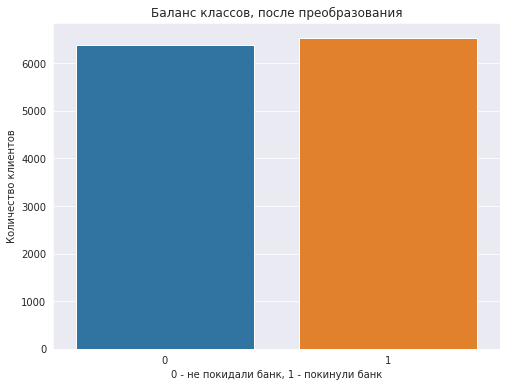

In [41]:
sns.set_style('darkgrid')
# график баланса классов
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=y_upsampled, x='Exited', ax=ax)
ax.set_title('Баланс классов, после преобразования')
ax.set_xlabel('0 - не покидали банк, 1 - покинули банк')
ax.set_ylabel('Количество клиентов')

# вывод количества значений каждого класса в датасете
print(y_upsampled['Exited'].value_counts())

### Уменьшение выборки.

In [19]:
def downsample(features, target):
    features_zeros = features[target['Exited'] == 0]
    features_ones = features[target['Exited'] == 1]
    target_zeros = target[target['Exited'] == 0]
    target_ones = target[target['Exited'] == 1]
    
    # Определите количество образцов класса с меньшим количеством
    desired_length = len(target_ones)
    
    # Случайным образом выберите образцы из класса с большим количеством
    features_zeros_downsampled = features_zeros.sample(desired_length, random_state=42)
    target_zeros_downsampled = target_zeros.sample(desired_length, random_state=42)
    
    # Объедините выбранные образцы с образцами класса Exited=1 для получения нового сбалансированного датасета
    features_downsampled = pd.concat([features_zeros_downsampled, features_ones])
    target_downsampled = pd.concat([target_zeros_downsampled, target_ones])
    
    # Перемешайте данные
    features_downsampled = shuffle(features_downsampled, random_state=42)
    target_downsampled = shuffle(target_downsampled, random_state=42)
    
    return features_downsampled, target_downsampled

X_downsampled, y_downsampled = downsample(X_train, y_train)

0    1630
1    1630
Name: Exited, dtype: int64


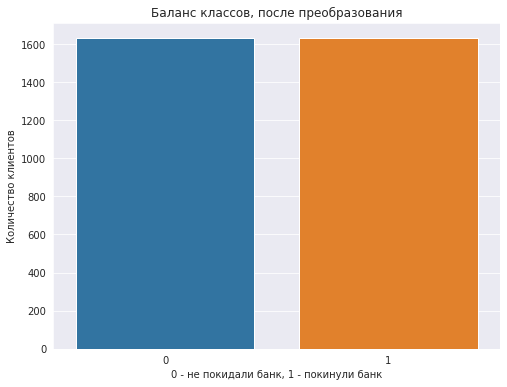

In [20]:
sns.set_style('darkgrid')
# график баланса классов
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=y_downsampled, x='Exited', ax=ax)
ax.set_title('Баланс классов, после преобразования')
ax.set_xlabel('0 - не покидали банк, 1 - покинули банк')
ax.set_ylabel('Количество клиентов')

# вывод количества значений каждого класса в датасете
print(y_downsampled['Exited'].value_counts())

In [21]:
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
# Задаем модель для обучения
params_forest = {'max_depth': range (1, 9, 1), 'max_features': ['auto', 'sqrt', 'log2'],
                 'n_estimators': range(50, 100, 10)}
# Указываем параметры для перебора
cv_forest_upsampled = GridSearchCV(random_forest, param_grid=params_forest, scoring='f1', n_jobs=-1)

cv_forest_upsampled.fit(X_upsampled, y_upsampled)

NameError: name 'X_upsampled' is not defined

In [43]:
print('Лучший случайный лес:', cv_forest_upsampled.best_estimator_)
print('F-1 score:', cv_forest_upsampled.best_score_)
predict_one = cv_forest_upsampled.predict_proba(X_train)[:, 1]
print('ROC-AUC:', roc_auc_score(y_train, predict_one))

Лучший случайный лес: RandomForestClassifier(max_depth=8, n_estimators=50, random_state=9)
F-1 score: 0.8131386799000475
ROC-AUC: 0.9159651260220936


In [22]:
random_forest_downsampled = RandomForestClassifier(random_state=RANDOM_STATE)
# Задаем модель для обучения
params_forest_downsampled = {'max_depth': range (1, 9, 1), 'max_features': ['auto', 'sqrt', 'log2'],
                 'n_estimators': range(50, 100, 10)}
# Указываем параметры для перебора
cv_forest_downsampled = GridSearchCV(random_forest_downsampled, param_grid=params_forest, scoring='f1', n_jobs=-1)

cv_forest_downsampled.fit(X_downsampled, y_downsampled)

GridSearchCV(estimator=RandomForestClassifier(random_state=9), n_jobs=-1,
             param_grid={'max_depth': range(1, 9),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(50, 100, 10)},
             scoring='f1')

In [24]:
print('Лучший случайный лес:', cv_forest_downsampled.best_estimator_)
print('F-1 score:', cv_forest_downsampled.best_score_)
predict_one = cv_forest_downsampled.predict_proba(X_downsampled)[:, 1]
print('ROC-AUC:', roc_auc_score(y_downsampled, predict_one))

Лучший случайный лес: RandomForestClassifier(max_depth=8, n_estimators=50, random_state=9)
F-1 score: 0.7672273407389646
ROC-AUC: 0.928671572132937


In [44]:
best_forest_upsampled = RandomForestClassifier(max_depth=8, n_estimators=50, random_state=RANDOM_STATE)
scores = cross_validate(best_forest_upsampled, X_upsampled, y_upsampled,
                        scoring='f1', return_estimator=True)
best_forest_upsampled.fit(X_upsampled, y_upsampled)

print('Лучший случайный лес:', best_forest_upsampled)
print('F-1 score:', scores['test_score'].mean())
print('ROC-AUC:', roc_auc_score(y_upsampled, (best_forest_upsampled.predict_proba(X_upsampled)[:, 1])))

Лучший случайный лес: RandomForestClassifier(max_depth=8, n_estimators=50, random_state=9)
F-1 score: 0.8131386799000475
ROC-AUC: 0.9159651260220936


In [57]:
best_forest_downsampled = RandomForestClassifier(max_depth=8, n_estimators=50, random_state=RANDOM_STATE)
scores = cross_validate(best_forest_downsampled, X_downsampled, y_downsampled,
                        scoring='f1', return_estimator=True)
best_forest_downsampled.fit(X_downsampled, y_downsampled)

print('Лучший случайный лес:', best_forest_downsampled)
print('F-1 score:', scores['test_score'].mean())
print('ROC-AUC:', roc_auc_score(y_downsampled, (best_forest_downsampled.predict_proba(X_downsampled)[:, 1])))

Лучший случайный лес: RandomForestClassifier(max_depth=8, n_estimators=50, random_state=9)
F-1 score: 0.7672273407389646
ROC-AUC: 0.928671572132937


После применения метода увеличения выборки мы обнаружили, что лучшая модель случайного леса имеет глубину дерева (max_depth) равную 8 и количество деревьев (n_estimators) равное 50. Она показала значительно более высокое значение F1-меры по сравнению с предыдущими моделями, как с балансировкой классов, так и без нее. ROC-AUC для данной модели также достаточно высокая. 

Итак, мы определили эту модель как итоговую и считаем, что она отвечает всем требованиям, которые были поставлены перед нами заказчиком.

## Финальное тестирование.

Последний этап работы заключается в анализе работы построенной модели на тестовых данных. Напомним, что после проведения последнего этапа работы мы выбрали в качестве итоговой модель случайного леса с глубиной дерева (max_depth) равной 8 и количеством деревьев (n_estimators) равными 50.

In [45]:
print('F-1 score:', f1_score(y_test, cv_forest_upsampled.predict(X_test)))
print('ROC-AUC:', roc_auc_score(y_test, (best_forest_upsampled.predict_proba(X_test)[:, 1])))

F-1 score: 0.6294736842105263
ROC-AUC: 0.8705739637943027


In [58]:
print('F-1 score:', f1_score(y_test, cv_forest_downsampled.predict(X_test)))
print('ROC-AUC:', roc_auc_score(y_test, (best_forest_downsampled.predict_proba(X_test)[:, 1])))

F-1 score: 0.5992141453831041
ROC-AUC: 0.8639093639093639


Модель случайного леса показала хороший результат на тренировочной выборке, однако значение ключевых метрик снизилось на тестовой выборке. Возможной причиной этой ситуации может быть переобучение модели, когда она слишком точно адаптировалась к тренировочным данным. В данном случае, мы также можем предположить, что искусственно увеличенное количество положительных наблюдений могло оказать свое влияние - модель получила большое количество однотипных положительных ответов, что повлияло на ее результаты.

## Выводы.

Мы выполнили работу по созданию модели, которая смогла бы помочь в выявлении потенциальных клиентов, склонных к отказу от услуг "Бета-Банка". Для этого мы рассмотрели три различные модели: логистическую регрессию, решающие деревья и модель случайного леса. Наша цель заключалась в подборе оптимальных параметров для каждой из них, так чтобы на тестовой выборке мы могли получить максимальное значение F1-меры.

На первом этапе моделирования мы перепроверили исходные данные и обнаружили присутствие дисбаланса классов. После обучения моделей на этих данных, мы выявили, что ни одна из них не смогла достичь ключевого порогового значения F1-меры в 0,59. На втором этапе использовали различные подходы для ослабления влияния дисбаланса: мы меняли веса классов и увеличивали количество наблюдений с положительными ответами. За счет применения этих методов все модели, которые мы построили на втором этапе работали более эффективно и пересекли необходимый порог качества.

Таким образом, после всех экспериментов и анализа результатов, мы выбрали модель случайного леса в качестве нашей итоговой модели. Она показала лучший результат при тренировке наших данных. Мы использовали увеличение количества положительных ответов для учета дисбаланса классов, и это помогло нам достичь наивысшей F1-меры. Модель случайного леса с параметрами max_depth=8 и n_estimators=50 была определена как итоговая модель.

Однако, проверив качество нашей итоговой модели на тестовой выборке, мы обнаружили, что ее результаты снизились по сравнению с результатами на тренировочной выборке. Такой исход может свидетельствовать о переобучении нашей модели. Мы анализируем ситуацию и рассматриваем возможное решение проблемы.

Нашей главной целью было создание эффективной модели, которая будет способна выделять тех клиентов, которые склонны к отказу от использования услуг "Бета-Банка". Модель случайного леса с параметрами max_depth=8 и n_estimators=50 смогла достичь высоких показателей на тренировочных данных, что свидетельствует о ее эффективности. Однако, наиболее вероятной причиной снижения ее показателей на тестовой выборке является переобучение нашей модели на тренировочных данных, из-за чего она не может хорошо обобщать новые, неизвестные данные.

Для того чтобы решить эту проблему, мы можем применить различные методы, например, можно увеличить объем тестовой выборки, использовать регуляризации или обучение на кросс-валидации. Также мы можем пересмотреть предобработку данных или примененные методы балансировки классов. На данном этапе мы приступаем к анализу данных нашей модели, чтобы выявить наиболее вероятные причины переобучения. Мы можем обратить внимание на характеристики данных, которые могут повлиять на работу модели, например, качество признаков, их корреляцию и многообразие.

После того, как мы проанализируем данные нашей модели, мы будем взвешивать различные опции по повышению ее качества на тестовых данных. Если это не сработает, мы можем вернуться к предыдущим этапам работы, чтобы улучшить качество наших данных и повысить эффективность модели.

В целом, наша работа демонстрирует, что построение эффективной модели для выявления клиентов, склонных к отказу от услуг банка, является сложным заданием, требующим тщательного анализа данных и подбора оптимальных показателей модели. Несмотря на возможные проблемы, мы продолжаем работать над улучшением нашей модели и получению наиболее точных результатов